In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")
                
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

# viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12.7,10.27)})

# notebook settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import os
os.environ["CUDA_VISIBLE_DEVICES"]="4"

In [5]:
import glob

In [7]:
base = "/srv/nas/mk2/projects/pan-cancer/TCGA_CCLE_GCP"
tcga_files = glob.glob(os.path.join(base, 'TCGA/TCGA_*_counts.tsv.gz'))

In [65]:
def readGCP(base_dir, f_pattern):
    data_dict = {}
    files = glob.glob(os.path.join(base_dir, f_pattern))
    for f in files[:3]:
        key = os.path.basename(f).split("_")[1]
        data = pd.read_csv(f, sep='\t', index_col=0)
        meta = pd.DataFrame([row[:-1] for row in data.index.str.split("|")],
                            columns=['ENST', 'ENSG', 'OTTHUMG', 'OTTHUMT', 'GENE-NUM', 'GENE', 'NUM', 'TYPE'])
        data.index = meta['GENE']
        data_dict[key] = data.T
    return data_dict

In [66]:
bar = readGCP(base, 'TCGA/TCGA_*_counts.tsv.gz')

In [68]:
bar.keys()

dict_keys(['UCEC', 'THYM', 'SARC'])

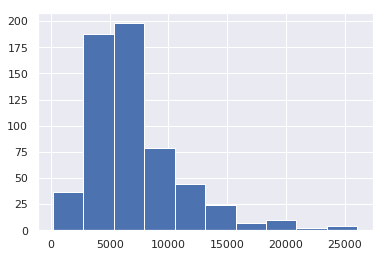

In [72]:
bar['UCEC'].iloc[:,0].hist()

In [79]:
tcga_meta = pd.read_csv(os.path.join(base, "TCGA/TCGA_ID_MAP.csv"), sep=",")

In [80]:
tcga_meta.head()

,CGHubAnalysisID,AliquotBarcode,Aliquot_id,Disease
0,3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,66770b06-2cd6-4773-b8e8-5b38faa4f5a4,LGG
1,c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,24ee58d3-60c9-4808-b35a-2767594b83f8,UCEC
2,21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,ee589fc8-daf6-4da9-9708-f18a86b96b22,LUSC
3,6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,08dbecd4-ba05-4d62-b76c-62fddccdb167,UCS
4,c8eda0ee-e5e3-4847-8c9d-c816811d6e41,TCGA-L9-A444-01A-21R-A24H-07,a3b81644-c1b8-4d12-b6f8-6160533758cc,LUAD


In [85]:
tcga_meta['Case ID'] = [id[0] + "-" + id[1] + "-" + id[2] for id in tcga_meta['AliquotBarcode'].str.split('-')]

In [87]:
tcga_meta['Sample ID'] = [id[0] + "-" + id[1] + "-" + id[2] + "-" + id[3] for id in tcga_meta['AliquotBarcode'].str.split('-')]

In [88]:
tcga_meta['Sample ID'].isin(samples['Sample ID']).sum() / len(tcga_meta['Sample ID'])

0.8281895717928427

Write out samples to upload to GDC to get sample sheet

In [99]:
tcga_meta['Sample ID'].to_csv(os.path.join(base, "TCGA/TCGA_ID_samples.csv"), index=False, header=False)

GDC sample sheet concatenation

In [105]:
gdc_list = [pd.read_csv(os.path.join(base, "TCGA/gdc_sample_sheet.2020-03-19_{}.tsv".format(i)), sep="\t") for i in range(1,3)]
gdc_samples = pd.concat(gdc_list, ignore_index=True)

In [108]:
gdc_samples['Sample ID'].nunique()

11057

In [109]:
# write out concat file
gdc_samples.to_csv(os.path.join(base, "TCGA/gdc_sample_sheet.tsv"), sep="\t", index=False)

In [110]:
gdc_samples.head()

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
0,f96c0a94-5c7c-4196-ac32-817b4b659857,6c0d24b4-b01c-4262-bf0d-60a4c4c11087.htseq.cou...,Transcriptome Profiling,Gene Expression Quantification,TCGA-BLCA,TCGA-FD-A3SJ,TCGA-FD-A3SJ-01A,Primary Tumor
1,e4c62f17-d1e8-4543-9b7e-daa2b68306e0,bc5be208-5934-40dd-81df-567599ea2a51.htseq.cou...,Transcriptome Profiling,Gene Expression Quantification,TCGA-LUSC,TCGA-33-6737,TCGA-33-6737-01A,Primary Tumor
2,6287b98b-2643-482d-831a-d4afcc8fe757,c13bf3e3-3287-485b-a5d2-5371af7897fb.htseq.cou...,Transcriptome Profiling,Gene Expression Quantification,TCGA-THCA,TCGA-EL-A3ZK,TCGA-EL-A3ZK-11A,Solid Tissue Normal
3,908202b7-bc21-4595-b1d3-8e53f64f3fde,2f5ab967-ce81-429c-946a-b63e08c0e501.htseq.cou...,Transcriptome Profiling,Gene Expression Quantification,TCGA-THCA,TCGA-E8-A432,TCGA-E8-A432-01A,Primary Tumor
4,99179019-2b64-416b-811e-ed56935e7808,4763c7e5-97e5-40ca-9455-761ac274e0b4.htseq.cou...,Transcriptome Profiling,Gene Expression Quantification,TCGA-THCA,TCGA-EM-A2P1,TCGA-EM-A2P1-01A,Primary Tumor


In [129]:
# merge and drop duplicates
anno = tcga_meta.merge(gdc_samples[['Sample ID', 'Sample Type']], left_on='Sample ID', right_on='Sample ID').drop_duplicates('CGHubAnalysisID')

In [130]:
anno.shape

(11150, 7)

In [134]:
anno.groupby(['Disease', 'Sample Type']).size().nlargest(50)

Disease  Sample Type                                    
BRCA     Primary Tumor                                      1119
UCEC     Primary Tumor                                       555
KIRC     Primary Tumor                                       542
LUAD     Primary Tumor                                       536
LGG      Primary Tumor                                       511
LUSC     Primary Tumor                                       504
THCA     Primary Tumor                                       502
COAD     Primary Tumor                                       501
PRAD     Primary Tumor                                       501
HNSC     Primary Tumor                                       500
BLCA     Primary Tumor                                       414
STAD     Primary Tumor                                       375
OV       Primary Tumor                                       374
LIHC     Primary Tumor                                       371
SKCM     Metastatic              

In [141]:
# percentage with annotation for sample type
tcga_meta['Sample ID'].isin(gdc_samples['Sample ID']).sum() / len(tcga_meta['Sample ID'])

0.9803921568627451

In [136]:
anno.shape
tcga_meta.shape
gdc_samples.shape

(11150, 7)

(11373, 6)

(11389, 8)

In [138]:
anno.to_csv(os.path.join(base, "TCGA/TCGA_GDC_ID_MAP.tsv"), sep="\t", index=False)

Next subset raw data to only those with sample type annotations...

In [ ]:
ccle = pd.read_csv(os.path.join(base, "CCLE/"))